<img src="./0930a77ee0324179b794b6f574efc129.jpg" alt="EREN" width="98%" />

<h1 style="font-size: 7em; text-align: center;"><span style="color:#2E4053">LA POPULARIDAD DEL ANIME</span></h1>

 # <span style="color:#AEB6BF   "> ANALISIS EXPLORATORIO DE DATOS(EDA) DE LA POPULARIDAD DEL ANIME </span>
 

## <span style="color:#85929E "> TEMA </span>

ANIME. El anime es una forma de expresión artística japonesa que ha ganado popularidad a nivel mundial, ha cautivado a audiencias de todas las edades con sus historias, personajes memorables y estilos visuales. Asi que vamos a realizar un análisis exploratorio de datos para estudiar los factores que contribuyen a la popularidad en el mundo del anime.


### <span style="color:#85929E "> OBJETIVO </span>

El objetivo de este EDA es estudiar lo que resuena con la audiencia y contribuye a la popularidad en el mundo del anime 

## <span style="color:#85929E "> DATASETS Y FUENTES ALTERNATIVAS DE DATOS </span> 


**LINK de la base de datos que voy a usar en este EDA:**
>[KAGGLE- ANIME](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

>[KAGGLE- ANIME2](https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022)

>[Myanimelist API](https://myanimelist.net/apiconfig)

>[Kitsu API](https://kitsu.docs.apiary.io/#)

>[Anilist API](https://anilist.gitbook.io/anilist-apiv2-docs/)

>[RapidAPI](https://rapidapi.com/search/anime)

## <span style="color:#85929E "> IMPORTACIONES </span> 

In [712]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

## <span style="color:#85929E "> BASE DE DATOS INICIAL </span> 

In [713]:
anime = pd.read_csv("./anime.csv")
anime.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [714]:
#VER LA INFORMACION DE LA BASE DE DATOS INICIAL
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [715]:
#VER LAS FILAS Y COLUMNAS QUE TIENE
anime.shape

(14952, 25)

In [716]:
anime.describe(include=object).round(2)

,Name,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
count,14952,14952,14952,14952,13602,14952,14952,14952,14952,14952,14952,14952,14952,14952,14952
unique,14949,4839,6252,14176,12890,7,199,10722,231,3714,231,1048,16,301,7
top,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Hentai,Unknown,Unknown,No synopsis information has been added to this...,TV,1,Unknown,Unknown,Unknown,Unknown,Unknown,Manga,24 min. per ep.,PG-13 - Teens 13 or older
freq,3,967,8554,33,466,4650,6563,185,10456,6152,11007,4912,3764,1706,5975


In [717]:
anime.describe(exclude=object).round(2)

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.00,14952.00,13231.00,14952.00,14952.00,14952.00,14952.00,14952.00,14952.00,14952.00
mean,19017.43,6.51,6829.85,7465.97,40686.48,537.63,2619.81,25943.10,1121.31,1377.86
std,14588.76,0.81,4168.93,4313.17,134874.35,4399.02,15190.10,98127.29,4613.76,5110.87
min,1.00,1.85,1.00,1.00,200.00,0.00,0.00,0.00,0.00,0.00
25%,4602.50,6.08,3309.50,3732.00,736.00,1.00,27.00,246.00,14.00,48.00
50%,16729.00,6.51,6618.00,7466.50,3493.50,6.00,127.00,1515.50,78.00,102.00
75%,33513.25,7.01,9942.00,11194.00,19193.25,47.00,723.00,9797.00,388.25,377.00
max,48492.00,9.19,15780.00,17565.00,2589552.00,183914.00,887333.00,2182587.00,187919.00,174710.00


In [718]:
#VER SI MI BASE DE DATOS TIENE VALORES NULOS
anime.isna().sum() 

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [719]:
unknowns= (anime =='Unknown').sum().sum()

unknowns

45783

### Cardinalidad

In [720]:
anime.nunique()

anime_id         14952
Name             14949
Score              532
Genres            4839
English name      6252
Japanese name    14176
sypnopsis        12890
Type                 7
Episodes           199
Aired            10722
Premiered          231
Producers         3714
Licensors          231
Studios           1048
Source              16
Duration           301
Rating               7
Ranked            9159
Popularity        9979
Members           9337
Favorites         1543
Watching          3580
Completed         7821
On-Hold           2915
Dropped           3035
dtype: int64

## <span style="color:#85929E "> LIMPIEZA Y MODIFICACIONES DE LA BASE DE DATOS </span> 

#### <span style="color:#2874A6 ">A - Valores nulos </span> 

##### <span style="color:#76D7C4 "> A1 - Ver cuantos valores nulos tengo, donde y el total: </span> 

In [721]:
#CUANTOS VALORES NULOS TENGO POR CADA COLUMNA
anime.isnull().sum() 

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [722]:
#CUANTOS VALORES NULOS TENGO EN TOTAL
anime.isnull().sum().sum() 

3071

##### <span style="color:#76D7C4  "> A2- Visualizar la proporcion de valores nulos: </span>  

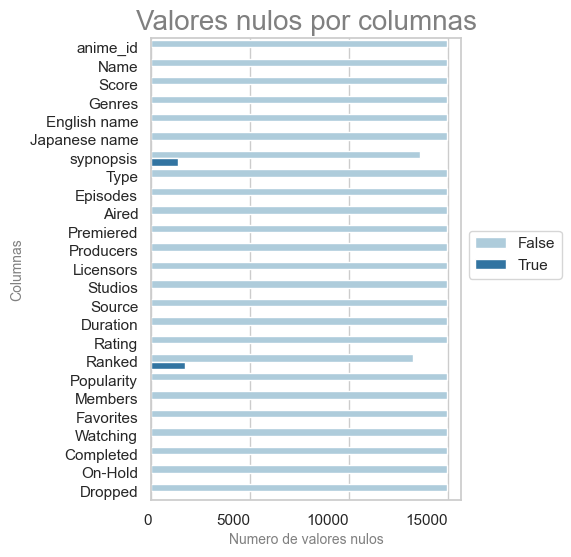

In [723]:
#GRAFICA PARA VISUALIZAR LA PROPORCION DE MIS DATOS NULOS
anime_nulos= anime.isnull()

plt.figure(figsize=(4,6))
sns.set(style="whitegrid")
sns.countplot(data=anime_nulos.melt(), y="variable", hue="value", palette="Paired" )
plt.title("Valores nulos por columnas", color="Grey", fontsize=20)
plt.ylabel("Columnas", color="Grey", fontsize=10)
plt.xlabel("Numero de valores nulos", color="Grey", fontsize=10)
plt.xticks(rotation=0, ha="right")
plt.legend(bbox_to_anchor=(1,0.6))

plt.show()

     Por lo que veo hay muy pocos nan, asi que veo conveniente desde mi punto de vista que deberia de borrar esas columnas ya que no las quiero analizar

##### <span style="color:#76D7C4  "> A3- Eliminar columnas con Nan: </span>  

In [724]:
#AHORA QUE VOY A MODIFICAR COSAS VOY A HACER UN COPY PARA NO ALTERAR MI BASE DE DATOS INICIAL
anime_copia= anime.copy()

In [725]:
#BORRAR ESTAS COLUMNAS Y FILAS YA QUE DESDE MI PUNTO DE VISTA SON INNECESARIAS PARA EL ANALISIS QUE VOY A HACER
anime_copia= anime_copia.dropna(subset=["Ranked"])
anime_copia.drop(["Ranked", "sypnopsis"], axis=1, inplace=True)

In [726]:
# COMPROBAR SI SE HA BORRADO CORRECTAMENTE ESAS COLUMNAS Y NO HAY NAN
anime_copia.isna().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

#### <span style="color:#2874A6 "> B - Valores duplicados </span> 

In [727]:
#QUIERO VER CUANTOS VALORES DUPLICADOS TENGO EN LA COLUMNA NAME
anime_copia["Name"].duplicated().sum()

1

In [728]:
#QUIERO ENCONTRAR LAS FILAS DUPLICADAS
dupli= anime_copia[anime.duplicated(subset="Name", keep=False)]
dupli["Name"]

C:\Users\Amy\AppData\Local\Temp\ipykernel_36140\3405832578.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dupli= anime_copia[anime.duplicated(subset="Name", keep=False)]


11880                                          Hinamatsuri
12365                                          Hinamatsuri
14123    Maou Gakuin no Futekigousha: Shijou Saikyou no...
Name: Name, dtype: object

In [729]:
# BORRAR DUPLICADAS QUE NO TENGAN EL MISMO TYPE
anime_copia= anime_copia.drop_duplicates(subset=["Name","Type"],keep="first" )

In [730]:
#COMPROBAR SI SE HA BORRADO CORRECTAMENTE LOS VALORES DUPLICADOS 
anime_copia["Name"].duplicated().sum()

1

<span style="color:#76D7C4"> Comprobar columna: </span>  

In [731]:
#COMPRUEBO FILAS Y COLUMNAS OTRA VEZ
anime_copia.shape

(13231, 23)

#### <span style="color:#2874A6"> C - COLUMNAS </span> 

<span style="color:#2ECC71"> Quiero ver el contenido de algunas columnas ya que he visto que ya no tiene Nan pero tiene algunos valores desconocidos</span>  
    

In [732]:
unknowns= (anime_copia =='Unknown').sum()
unknowns

anime_id            0
Name                0
Score               0
Genres             42
English name     7316
Japanese name      27
Type                0
Episodes          135
Aired              25
Premiered        8810
Producers        5574
Licensors        9495
Studios          3840
Source           2722
Duration          128
Rating            335
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [733]:
unknowns= (anime_copia =='Unknown').sum().sum()

unknowns

38449

##### <span style="color:#76D7C4"> C1 - Columna generos: </span> 

<span style="color:#2ECC71"> En la columna generos he visto que la mayoria de generos 
     en cada fila vienen en listas. </span>  
     
<span style="color:#2ECC71"> Asi que voy a separarlos haciendo un split y un dummy para 
     crear un nuevo dataframe de generos:</span>  

In [734]:
anime_copia["Genres"].unique()

array(['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
       'Action, Drama, Mystery, Sci-Fi, Space',
       'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen', ...,
       'Action, Cars, Sports', 'Mystery, Supernatural, School',
       'Mystery, Psychological, Supernatural, Thriller, Shounen'],
      dtype=object)

     Los generos de cada fila vienen en listas, asi que voy a separarlos haciendo un dummy

In [735]:
#HAGO UNA FUNCION LAMBDA CON SPLIT PARA SEPARAR LOS GENEROS DE UNA LISTA DE GENEROS
anime_copia["Genres"]= anime_copia["Genres"].apply(lambda x: x.split(','))

In [736]:
#HACER UNA VARIABLE DUMMY PARA DIVIDIR LOS GENEROS EN UN DATAFRAME
generos=pd.get_dummies(anime_copia["Genres"].apply(pd.Series).stack()).groupby(level=0).max()

In [737]:
generos.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire
0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### <span style="color:#76D7C4"> C2 - Columna Aired: </span> 

<span style="color:#2ECC71"> En la columna Aired he visto que va a ser dificil de analizar por como estan las fechas, algunas tienen fecha de lanzamiento y fecha final o la fecha final con interrogacion.</span>  
    
<span style="color:#2ECC71"> Asi que voy a hacer un regex para separar el mes de salida y el año en una columna llamada meses y luego otro para separar la columna meses en month aired y year aired:</span>  
    

In [701]:
#VER PARTE DEL CONTENIDO DE ESA COLUMNA
anime_copia["Aired"].unique()

array(['Apr 3, 1998 to Apr 24, 1999', 'Sep 1, 2001',
       'Apr 1, 1998 to Sep 30, 1998', ..., 'Feb 11, 2021 to ?',
       'Feb 12, 2021', 'Mar 14, 2021'], dtype=object)

In [702]:
#AQUI HE HECHO UN REGEX PARA SEPARAR PARTE DE AIRED Y PODER CREAR DOS COLUMNAS SEPARADAS DE MES Y AÑO POR QUE ES LA UNICA MANERA QUE ME HA FUNCIONADO
anime_copia["Meses"]= anime_copia["Aired"].str.extract(r"(\w{3} \d{1,2}, \d{4})")

#SEPARAR LOS MESES Y Y METERLO EN UNA COLUMNA LLAMADA MES DE LANZAMIENTO
anime_copia["Month Aired"] =anime_copia["Meses"].str.extract(r"(\w{3})")
#LO MISMO CON EL AÑO
anime_copia["Year Aired"] =anime_copia["Meses"].str.extract(r", (\d{4})")

In [703]:
#VER SI HA FUCIONADO 
anime_copia.head(3)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Meses,Month Aired,Year Aired
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678,"Apr 3, 1998",Apr,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770,"Sep 1, 2001",Sep,2001
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925,"Apr 1, 1998",Apr,1998


     Ahora tengo unas columnas que sobran que son Aired y Meses, asi que voy a eliminarlas

In [704]:
#ELIMINAR LAS COLUMNAS AIRED Y MESES
anime_copia.drop(columns=["Aired", "Meses"], inplace=True)

In [705]:
#COMO NO QUIERO QUE MES Y AÑO SEAN LAS ULTIMAS COLUMNAS VOY A CAMBIARLAS DE SITIO

#AQUI HAGO UN POP PARA LUEGO PODER INSERTARLO EN LA POSICION QUE QUIERA Y NO SEA LA ULTIMA COLUMNA, NO ME DEJABA SIN EL POP
mes = anime_copia.pop("Month Aired")
anime_copia.insert(5, "Month Aired", mes)

In [706]:
#LO PONGO EN LA POSICION DE AL LADO DE MES DE LANZAMIENTO
year= anime_copia.pop("Year Aired")
anime_copia.insert(6, "Year Aired", year)

In [707]:
anime_copia.head(3)

#todo OK por ahora

,anime_id,Name,Score,Genres,English name,Month Aired,Year Aired,Japanese name,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,Apr,1998,カウボーイビバップ,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,2001,カウボーイビバップ 天国の扉,Movie,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,Apr,1998,トライガン,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925


##### <span style="color:#76D7C4"> Comprobar otra vez los valores nan: </span> 

<span style="color:#2ECC71"> Ahora es posible haya valores nan por la modificacion de la columna Aired</span>  

<span style="color:#2ECC71"> Voy a ver si hay valores nan y si es asi hare un fillna llamando unknown a los valores nan para despues poder hacer sacar los valores unknows basandome en la moda del mismo tipo de anime y estudios:</span>  

In [708]:
anime_copia.isna().sum()

anime_id           0
Name               0
Score              0
Genres             0
English name       0
Month Aired      934
Year Aired       934
Japanese name      0
Type               0
Episodes           0
Premiered          0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Popularity         0
Members            0
Favorites          0
Watching           0
Completed          0
On-Hold            0
Dropped            0
dtype: int64

In [709]:
#POR AHORA LOS VOY A LLAMAR A LOS VALORES NAN UNKOWNS PARA PASAR A LO SIGUIENTE Y QUE NO ME DE ERROR POR LOS NAN
anime_copia["Month Aired"]= anime_copia["Month Aired"].fillna("Unknown")
anime_copia["Year Aired"]= anime_copia["Year Aired"].fillna("Unknown")

In [710]:
anime_copia.isnull().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Month Aired      0
Year Aired       0
Japanese name    0
Type             0
Episodes         0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

In [711]:
# CON ESTO QUIERO SACAR LOS VALORES UNKNOWNS BASANDOME EN LA MODA DEL MISMO TIPO DE ANIME Y ESTUDIOS
mes =anime_copia.groupby(["Type","Studios"])["Month Aired"].apply(lambda x:x.mode().iloc[0] if not x.empty else "Unknown").reset_index()
grupo= dict(zip(zip(mes["Type"], mes["Studios"]), mes["Month Aired"]))

anime_copia["Month Aired"]= anime_copia.apply(lambda f :grupo.get((f["Type"], f["Studios"]),"Unknown") if f["Month Aired"] =="Unknown" else f["Month Aired"], axis=1)

anime_copia.head(4)

,anime_id,Name,Score,Genres,English name,Month Aired,Year Aired,Japanese name,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,Apr,1998,カウボーイビバップ,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,2001,カウボーイビバップ 天国の扉,Movie,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,Apr,1998,トライガン,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Dr...",Witch Hunter Robin,Jul,2002,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,1467,94683,587,4300,46165,5121,5378


In [512]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_copia["Month Aired"].isin(["Unknown"]).sum()

625

In [513]:
#VER CUANTOS UNKNOW ME QUEDAN EN EL DATAFRAME - LA ULTIMA VEZ ERAN 45783
unknowns= (anime_copia =="Unknown").sum().sum()

unknowns

39941

##### <span style="color:#76D7C4"> C3 - Columna premiered: </span> 

<span style="color:#2ECC71"> En la columna Premiered hay algunos valores unknowns y tambien todos tienen el año de salida y para analizar asi puede ser un poco complicado.</span> 

<span style="color:#2ECC71"> Primero voy a quitar el año de las estaciones del año por que ahi no me interesa:</span>  

In [514]:
#AQUI QUIERO DEJAR LA ESTACION DEL AÑO Y ELIMINAR EL AÑO 
anime_copia["Season Premiered"]= anime_copia["Premiered"].str.split().str[0]

#PONERLA EN EL MISMO SITIO QUE PREMIERED ORIGINAL
anime_copia["Premiered"]= anime_copia.pop("Season Premiered") 

In [515]:
#COMPROBAR SI HA FUNCIONADO
anime_copia["Premiered"]

0         Spring
1        Unknown
2         Spring
3         Summer
4           Fall
          ...   
14916     Winter
14917    Unknown
14918    Unknown
14924    Unknown
14943    Unknown
Name: Premiered, Length: 13231, dtype: object

<span style="color:#2ECC71"> Y ahora voy a hacer una funcion lambda para que segun el mes de lanzamiento me ponga en la columna premiered la estacion del año que le corresponde:</span>  

In [516]:
#MAPEAR LOS MESES A ESTACIONES DEL AÑO
estaciones = {"Dec": "Winter",
              "Jan": "Winter",
              "Feb":"Winter",
              "Mar":"Spring" ,
              "Apr" :"Spring",
              "May":"Spring" ,
              "Jun": "Summer",
              "Jul" :"Summer",
              "Aug": "Summer",
              "Sep":"Fall",
              "Oct":"Fall" ,
              "Nov": "Fall"}

# CON ESTE REEMPLAZO LOS UNKNOWS POR LAS ESTACIONES
quitar_desconocidos= lambda row: estaciones.get(row["Month Aired"], row["Premiered"])
anime_copia["Premiered"]= anime_copia.apply(quitar_desconocidos, axis=1)

In [517]:
#COMPROBAR SI SE HAN CAMBIADO
anime_copia["Premiered"].unique() 

array(['Spring', 'Fall', 'Summer', 'Winter', 'Unknown'], dtype=object)

In [518]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_copia["Premiered"].isin(["Unknown"]).sum()

623

In [519]:
#VER CUANTOS UNKNOW ME QUEDAN EN EL DATAFRAME - LA ULTIMA VEZ ERAN 39941
unknowns= (anime_copia =="Unknown").sum().sum()

unknowns

31754

##### <span style="color:#76D7C4"> C4 - Columna rating </span> 

<span style="color:#2ECC71"> En la columna Rating mas de lo mismo, va a ser poco visual analizarlo como esta.</span> 

<span style="color:#2ECC71"> Voy a hacer un regex para separar la R, PG, G y que solo se vea la columna con esos. Despues voy a quitar los unknowns sacando el valor mas comun del rating por genero:  </span> 

In [520]:
#QUIERO DEJAR SOLO LAS LETRAS R, PG, R+ Y G
anime_copia["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Unknown'],
      dtype=object)

In [521]:
#SEPARAR LA R, PG, R+ Y G DEL RESTO DEL VALOR DE RATING 
anime_copia["Rating"]= anime_copia["Rating"].str.extract(r"(R|PG|R\+|G|)")

In [522]:
# RENOMBRAR A LOS NAN COMO ESTABAN POR UNKNOWN

anime_copia["Rating"]= anime_copia["Rating"].fillna("Unknown") 
anime_copia["Rating"] = anime_copia["Rating"].replace("", "Unknown")

In [523]:
# QUIERO SACAR EL RATING PREDOMINANTE POR GENERO.
# ASI QUE CON LA MODA VOY A SACAR EL VALOR MAS COMUN DEL RATING POR GENERO PARA QUITAR UNKNOWSS
generos_edades={}

for g in generos.columns:
    filas_g= anime_copia[generos[g]==1] 
    moda_rating=filas_g["Rating"].mode().iloc[0] if not filas_g.empty else "Unknown"
    generos_edades[g]=moda_rating

In [524]:
# AQUI PONGO EL RATING MAS COMUN QUE HE SACADO POR GENERO EN LA COLUMNA 
for index, f in anime_copia.iterrows():
    if f["Rating"]=="Unknown":
        genres_porfila= generos.loc[index, generos.columns]
        rating= genres_porfila.idxmax()
        resultado= generos_edades.get(rating,"Unknown")
        anime_copia.at[index,"Rating"]= resultado

In [525]:
anime_copia["Rating"]

0         R
1         R
2        PG
3        PG
4        PG
         ..
14916     R
14917    PG
14918     R
14924    PG
14943    PG
Name: Rating, Length: 13231, dtype: object

In [526]:
anime_copia["Rating"].unique()

array(['R', 'PG', 'G'], dtype=object)

In [527]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_copia["Rating"].isin(["Unknown"]).sum()

0

In [528]:
#VER CUANTOS UNKNOW ME QUEDAN EN EL DATAFRAME - LA ULTIMA VEZ ERAN 31754
unknowns= (anime_copia =="Unknown").sum().sum()

unknowns

31419

##### <span style="color:#76D7C4"> C5 - Columna duration </span> 

<span style="color:#2ECC71"> En la columna duracion hay peliculas, series etc. Por lo tanto cuando voy a visualizarlo se hace casi imposible</span> 

<span style="color:#2ECC71"> Quiero convertir todas las duraciones en minutos:</span> 

In [529]:
anime_copia["Duration"].unique()

array(['24 min. per ep.', '1 hr. 55 min.', '25 min. per ep.',
       '23 min. per ep.', '27 min. per ep.', '24 min.', '22 min. per ep.',
       '1 hr. 44 min.', '1 hr. 27 min.', '1 hr. 22 min.',
       '30 min. per ep.', '1 hr. 31 min.', '2 hr. 4 min.',
       '1 hr. 45 min.', '52 min.', '1 hr. 59 min.', '2 hr.',
       '21 min. per ep.', '14 min. per ep.', '12 min. per ep.',
       '34 min. per ep.', '46 min. per ep.', '1 hr. 37 min.',
       '20 min. per ep.', '2 hr. 15 min.', '26 min. per ep.',
       '28 min. per ep.', '21 min.', '46 min.', '15 min. per ep.',
       '2 hr. 5 min.', '29 min. per ep.', '33 min. per ep.',
       '1 hr. 24 min.', '48 min.', '1 hr. 19 min.', '25 min.',
       '1 hr. 30 min.', '1 hr. 1 min.', '4 min. per ep.',
       '7 min. per ep.', '1 hr. 46 min.', '18 min. per ep.',
       '1 hr. 41 min.', '11 min. per ep.', '13 min. per ep.', '55 min.',
       '1 hr. 21 min.', '1 hr. 2 min.', '37 min. per ep.',
       '42 min. per ep.', '37 min.', '19 min.', '1 hr. 

In [530]:
#PASAR TODAS LAS HORAS A MINUTOS 
regex_min= r"(\d+)\s*(hr|min|sec)"

def minutos(duracion):
    total_min=0
    for min in duracion:
        value, unit= min
        value = int(value)
        if unit== "hr":
            total_min +=value*60
        elif unit == "min":
            total_min +=value
        elif unit== "sec":
            total_min+= value/60
    return round(total_min)

anime_copia["Duracion"]= anime_copia["Duration"].str.findall(regex_min).apply(minutos)


In [531]:
#COLOCAR LA COLUMNA DURATION EN LA POSICION QUE ESTABA
anime_copia.drop(columns=["Duration"], inplace=True)

duracion= anime_copia.pop("Duracion")
anime_copia.insert(7,"Duracion", duracion)

In [532]:
anime_copia.head(4)

,anime_id,Name,Score,Genres,English name,Month Aired,Year Aired,Duracion,Japanese name,Type,...,Studios,Source,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,Apr,1998,24,カウボーイビバップ,TV,...,Sunrise,Original,R,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,2001,115,カウボーイビバップ 天国の扉,Movie,...,Bones,Original,R,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,Apr,1998,24,トライガン,TV,...,Madhouse,Manga,PG,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Jul,2002,25,Witch Hunter ROBIN (ウイッチハンターロビン),TV,...,Sunrise,Original,PG,1467,94683,587,4300,46165,5121,5378


In [533]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_copia["Duracion"].isin(["Unknown"]).sum()

0

In [534]:
#VER CUANTOS UNKNOW ME QUEDAN EN EL DATAFRAME - LA ULTIMA VEZ ERAN 31419
unknowns= (anime_copia =="Unknown").sum().sum()

unknowns

31291

##### <span style="color:#76D7C4"> C6 - Columna English name </span> 

In [535]:
anime_copia["English name"].unique()

array(['Cowboy Bebop', 'Cowboy Bebop:The Movie', 'Trigun', ...,
       'Cooking with Valkyries Spring Festival Special',
       'The Promised Neverland Season 2 Episode 5.5',
       'Immemorial Love For You 2nd Season'], dtype=object)

In [536]:
#SUSTITUIR LOS VALORES UNKNOWN DE ENGLISH NAME POR EL NOMBRE ORIGINAL
anime_copia["English name"]= anime_copia.apply(lambda row: row["Name"] if row["English name"]=="Unknown" else row ["English name"],axis=1)

In [537]:
anime_copia.head(4)

,anime_id,Name,Score,Genres,English name,Month Aired,Year Aired,Duracion,Japanese name,Type,...,Studios,Source,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,Apr,1998,24,カウボーイビバップ,TV,...,Sunrise,Original,R,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,2001,115,カウボーイビバップ 天国の扉,Movie,...,Bones,Original,R,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,Apr,1998,24,トライガン,TV,...,Madhouse,Manga,PG,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Jul,2002,25,Witch Hunter ROBIN (ウイッチハンターロビン),TV,...,Sunrise,Original,PG,1467,94683,587,4300,46165,5121,5378


In [538]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_copia["English name"].isin(["Unknown"]).sum()

0

In [539]:
#VER CUANTOS UNKNOW ME QUEDAN EN EL DATAFRAME - LA ULTIMA VEZ ERAN 31291
unknowns= (anime_copia =="Unknown").sum().sum()

unknowns

23975

#### <span style="color:#2874A6"> D - Eliminar lo que no me interesa </span> 

<span style="color:#2ECC71">Ahora que ya he rellenado algunos unknowns con la columna producers y licensor voy a borrar las columnas que no me hacen falta</span> 

In [540]:
#BORRAR ESTAS COLUMNAS YA QUE DESDE MI PUNTO DE VISTA SON INNECESARIAS PARA EL ANALISIS QUE VOY A HACER
anime_copia.drop(["Japanese name","anime_id","Producers", "Licensors", "Year Aired", "Studios", "Source"], axis=1, inplace=True)

In [541]:
#COMPROBAR SI SE HAN ELIMINADO CORRECTAMENTE
anime_copia.head()

,Name,Score,Genres,English name,Month Aired,Duracion,Type,Episodes,Premiered,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,Apr,24,TV,26,Spring,R,39,1251960,61971,105808,718161,71513,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,115,Movie,1,Fall,R,518,273145,1174,4143,208333,1935,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,Apr,24,TV,26,Spring,PG,201,558913,12944,29113,343492,25465,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Jul,25,TV,26,Summer,PG,1467,94683,587,4300,46165,5121,5378
4,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,Sep,23,TV,52,Fall,PG,4369,13224,18,642,7314,766,1108


In [542]:
unknowns= (anime_copia =="Unknown").sum()
unknowns

Name              0
Score             0
Genres            0
English name      0
Month Aired     625
Duracion          0
Type              0
Episodes        135
Premiered       623
Rating            0
Popularity        0
Members           0
Favorites         0
Watching          0
Completed         0
On-Hold           0
Dropped           0
dtype: int64

In [543]:
anime_copia.replace("Unknown", pd.NA, inplace=True)
anime_copia = anime_copia.dropna()

In [544]:
unknowns= (anime_copia =="Unknown").sum().sum()
unknowns

0

## <span style="color:#85929E "> GUARDAR BASE DE DATOS </span> 

In [545]:
#Guardar base de datos limpia
#ruta= "./anime-filtered-Copy.csv"
#anime_copia.to_csv(ruta, index=False, encoding='utf-8')

## <span style="color:#85929E "> ANALISIS EXPLORATORIO </span> 

In [546]:
anime_copia.head(4)

,Name,Score,Genres,English name,Month Aired,Duracion,Type,Episodes,Premiered,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,Apr,24,TV,26,Spring,R,39,1251960,61971,105808,718161,71513,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Sep,115,Movie,1,Fall,R,518,273145,1174,4143,208333,1935,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,Apr,24,TV,26,Spring,PG,201,558913,12944,29113,343492,25465,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Jul,25,TV,26,Summer,PG,1467,94683,587,4300,46165,5121,5378


      DAFAFRAME GENEROS

In [265]:
generos

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire
0,True,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14917,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14918,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
14924,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [548]:
columnas= anime_copia.select_dtypes(exclude=object).corr().round(2)
columnas

,Score,Duracion,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
Score,1.00,0.27,-0.57,0.42,0.26,0.28,0.38,0.35,0.25
Duracion,0.27,1.00,-0.15,0.05,0.01,-0.01,0.05,-0.02,-0.03
Popularity,-0.57,-0.15,1.00,-0.45,-0.21,-0.29,-0.41,-0.38,-0.40
Members,0.42,0.05,-0.45,1.00,0.79,0.66,0.98,0.82,0.77
Favorites,0.26,0.01,-0.21,0.79,1.00,0.59,0.77,0.73,0.57
Watching,0.28,-0.01,-0.29,0.66,0.59,1.00,0.55,0.69,0.63
Completed,0.38,0.05,-0.41,0.98,0.77,0.55,1.00,0.73,0.69
On-Hold,0.35,-0.02,-0.38,0.82,0.73,0.69,0.73,1.00,0.89
Dropped,0.25,-0.03,-0.40,0.77,0.57,0.63,0.69,0.89,1.00


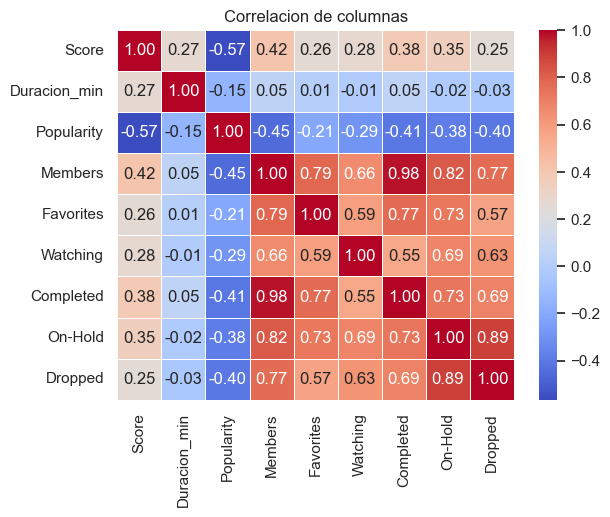

In [274]:
columnas= anime_copia.select_dtypes(exclude=object).corr()

sns.heatmap(columnas, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlacion de columnas")
plt.show()

     Existe una correlación negativa moderada entre la puntuación de un anime y su popularidad. En otras palabras, animes con puntuaciones más altas tienden a ser menos populares y viceversa.

     Interpretación: Hay una correlación positiva moderada entre la puntuación de un anime y su duración en minutos. Esto sugiere que animes con puntuaciones más altas pueden tener una duración más larga.

     Interpretación: Existe una correlación negativa moderada entre la popularidad de un anime y la cantidad de miembros que tiene. Animes más populares tienden a tener menos miembros.

     Interpretación: Hay una correlación positiva fuerte entre la cantidad de miembros y la cantidad de favoritos. A medida que la cantidad de miembros aumenta, la cantidad de favoritos también tiende a aumentar.

     Interpretación: Hay una correlación positiva muy fuerte entre la cantidad de miembros y la cantidad de animes completados. Los animes con más miembros tienden a ser más completados.

     Interpretación: Existe una correlación positiva muy fuerte entre los animes en estado "En espera" y los animes abandonados ("Dropped"). Los animes que los espectadores colocan en "En espera" tienden a tener una mayor probabilidad de ser abandonados

### <span style="color:#2874A6  "> Significado de las columnas </span> 

| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Name**| *Nombre del anime*|
| **Score** | *Puntuación media del anime* |
| **Genres** | *Generos del anime* |
| **English name** | *Nombre del anime en ingles* |
| **Type** | *Tipo de anime. serie, película u OVA* |
| **Episodes** | *Episodios del anime* |
| **Month Aired** | *Meses en los que se emitió el anime* |
| **Premiered** | *La temporada y año en que se estrenó el anime* |
| **Duration** | *La duración de cada episodio* |
| **Rating** | *La edad recomendada* |
| **Popularity** | *la popularidad del anime* |
| **Members** | *La cantidad de personas que tienen el anime en su lista* |
| **Favorites** | *La cantidad de personas que han marcado el anime como favorito* |
| **Watching** | *La cantidad de personas que actualmente ven el anime* |
| **Completed** | *La cantidad de personas que han completado la visualización del anime.* |
| **On-Hold** | *La cantidad de usuarion que estan a la espera de un anime* |
| **Dropped** | *La cantidad de usuarios que han abandonado el anime* |


### <span style="color:#2874A6  "> Informacion general de la base de datos </span> 

In [74]:
#INFORMACION
anime_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12472 entries, 0 to 14943
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12472 non-null  object 
 1   Score         12472 non-null  float64
 2   Genres        12472 non-null  object 
 3   English name  12472 non-null  object 
 4   Month Aired   12472 non-null  object 
 5   Duracion_min  12472 non-null  int64  
 6   Type          12472 non-null  object 
 7   Episodes      12472 non-null  object 
 8   Premiered     12472 non-null  object 
 9   Rating        12472 non-null  object 
 10  Popularity    12472 non-null  int64  
 11  Members       12472 non-null  int64  
 12  Favorites     12472 non-null  int64  
 13  Watching      12472 non-null  int64  
 14  Completed     12472 non-null  int64  
 15  On-Hold       12472 non-null  int64  
 16  Dropped       12472 non-null  int64  
dtypes: float64(1), int64(8), object(8)
memory usage: 1.7+ MB


In [75]:
#TIPOS DE DATOS
anime_copia.dtypes

Name             object
Score           float64
Genres           object
English name     object
Month Aired      object
Duracion_min      int64
Type             object
Episodes         object
Premiered        object
Rating           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
dtype: object

In [76]:
anime_copia.dtypes.value_counts()

object     8
int64      8
float64    1
Name: count, dtype: int64

In [77]:
anime_copia.describe()

,Score,Duracion_min,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,12472.000000,12472.000000,12472.000000,1.247200e+04,12472.000000,12472.000000,1.247200e+04,12472.000000,12472.000000
mean,6.599782,26.879169,7201.889272,4.752461e+04,625.940026,2958.954939,3.070224e+04,1289.312219,1598.257136
std,0.793250,26.769596,4447.200625,1.460210e+05,4674.460107,14309.071653,1.067831e+05,4678.777431,5325.855492
min,1.850000,0.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.180000,6.000000,3202.250000,7.417500e+02,1.000000,30.000000,2.800000e+02,17.000000,51.000000
50%,6.510000,23.000000,7063.500000,4.039500e+03,6.000000,132.000000,1.926000e+03,83.000000,106.000000
75%,7.110000,27.000000,11168.750000,2.618075e+04,60.000000,890.500000,1.438100e+04,523.000000,508.250000
max,9.190000,167.000000,17500.000000,2.589552e+06,183914.000000,566239.000000,2.182587e+06,130961.000000,174710.000000


In [78]:
anime_copia.shape

(12472, 17)

In [79]:
anime_copia.columns

Index(['Name', 'Score', 'Genres', 'English name', 'Month Aired',
       'Duracion_min', 'Type', 'Episodes', 'Premiered', 'Rating', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped'],
      dtype='object')

### <span style="color:#2874A6  "> Hipótesis: </span> 

    1.Existe relación entre la puntuación media y la popularidad.
    2.Las puntuaciones se puede ver afectada por la duracion del anime.
    3.Las series de anime con combinaciones de múltiples géneros tienden a tener puntuaciones más altas.
    4.Los animes estrenados en ciertas estaciones (primavera, verano, otoño) pueden tener puntuaciones más altas.
    5.Las películas de anime tienen puntuaciones más altas en comparación con las series de televisión, posiblemente debido a una duración más larga que permite una narrativa más intrincada.
    6.Impacto de la duración del anime en la cantidad de personas que lo completan.
    7.Los animes con clasificaciones de edad más altas pueden tener menor popularidad, ya que restringen al público potencial.
    8.El mes en que se estrena un anime puede influir en su clasificación.
    9.El número de espectadores que han completado un anime está positivamente correlacionado con su puntuación.

##### La frecuencia de cada genero de anime

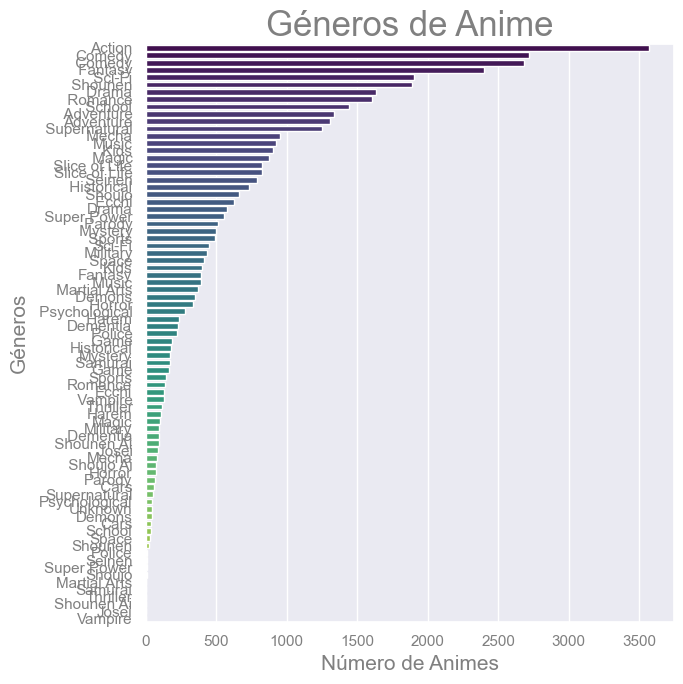

In [738]:
grafico_gen= generos.sum().sort_values(ascending= False)

plt.figure(figsize=(7,7))
sns.set_style("darkgrid")
ax = sns.barplot(x=grafico_gen.values, y=grafico_gen.index, hue=grafico_gen.index, palette="viridis", dodge=False)
plt.title("Géneros de Anime", color="Grey", fontsize=25)
plt.xlabel("Número de Animes", color= "Grey", fontsize=15)
plt.ylabel("Géneros",color = "Grey", fontsize =15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.tight_layout()
plt.show()

    Podemos ver que los generos mas comunes son comedia, accion, aventura, fantasia, ciencia ficcion y drama

##### Que estacion del año es la mas comun

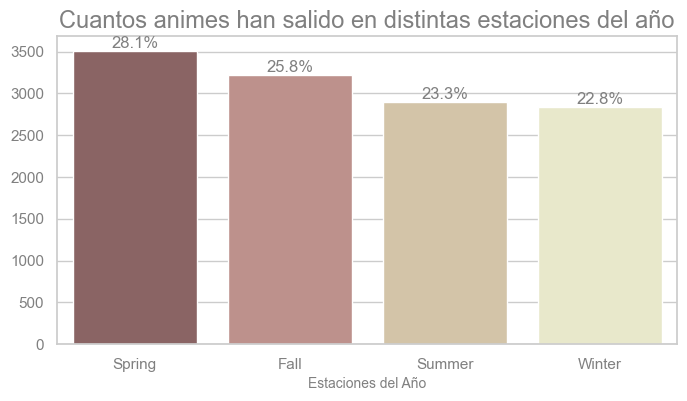

In [81]:
#anime_copia=anime_copia[anime_copia["Premiered"]!= "Unknown"]

season= anime_copia["Premiered"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
sns.barplot(x=season.index, y=season.values, hue=season.index, palette="pink")
plt.title("Cuantos animes han salido en distintas estaciones del año", color= "Grey", fontsize =17)
plt.xlabel("Estaciones del Año", color="Grey", fontsize= 10)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(season.values):
    porcentaje =(value / season.sum())* 100
    plt.text(i, value+0.1, f"{porcentaje:.1f}%", ha="center",va="bottom", color="grey")

plt.show()
#hacer nota 

     En esta columna podemos ver que en primavera y otoño suelen salir mas animes pero no hay mucha diferencia del resto. igualmente luego se vera si esta relacionado la estacion del año con la popularidad del anime

##### Para que publico suele ir dirigido el anime

In [82]:
anime_copia["Rating"].unique()

array(['R', 'PG', 'G'], dtype=object)

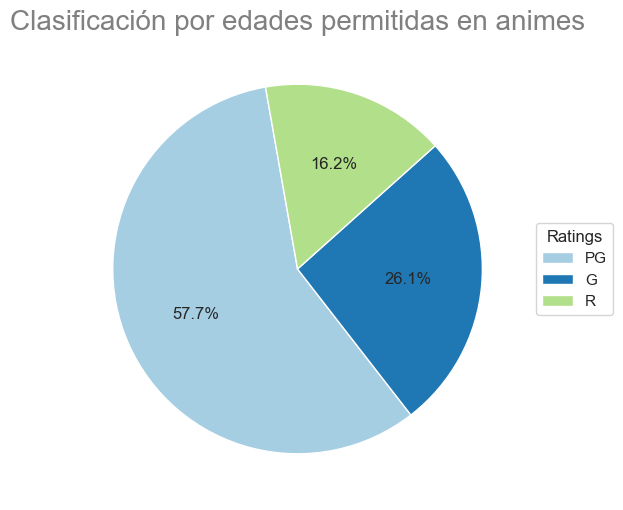

In [83]:
edades =anime_copia["Rating"].value_counts()

plt.figure(figsize=(6,6), facecolor="None")
plt.pie(edades, startangle=100, colors=sns.color_palette("Paired"), autopct="%1.1f%%")
plt.title("Clasificación por edades permitidas en animes", color="Grey", fontsize=20)
plt.legend(labels=edades.index, title="Ratings",bbox_to_anchor=(1.1,0.5), loc="center" ) # poner PG, G, R EN LA GRAFICA

plt.show()

     Aqui podemos ver que el rating de edad del 57% de los animes esta dirigido para niños.

     PG- PARA NIÑOS
     R- RESTRIGIDO A MENORES DE 17 AÑOS
     G - TODOS LOS PUBLICOS

##### En que mes es mas comun que salga un anime

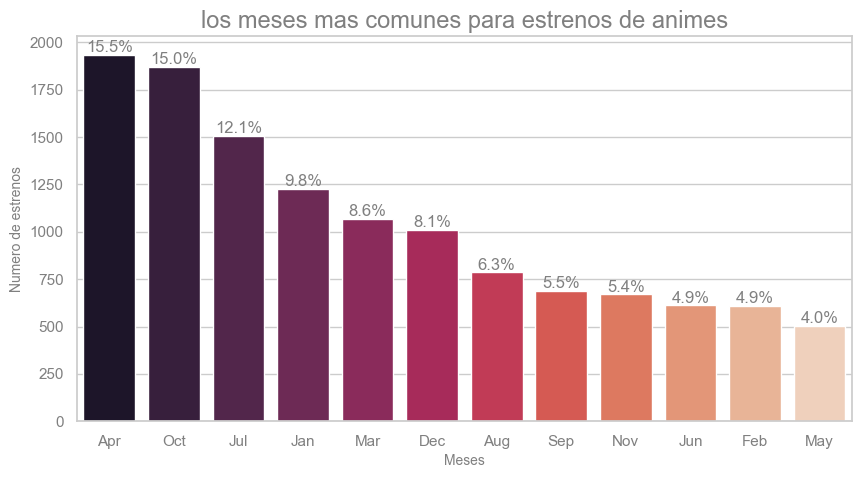

In [84]:
#anime_copia= anime_copia[anime_copia["Month Aired"] !="Unknown"]

month= anime_copia["Month Aired"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=month.index, y=month.values, hue=month.index, palette="rocket")
plt.title("los meses mas comunes para estrenos de animes", color="Grey", fontsize=17)
plt.xlabel("Meses", color="Grey", fontsize=10)
plt.ylabel("Numero de estrenos", color="Grey", fontsize=10)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(month.values):
    porcentaje = (value /month.sum()) * 100
    plt.text(i, value+ 0.1, f"{porcentaje:.1f}%", ha="center",va="bottom", color="grey")

plt.show()

#DEJAR COMENTARIO 

     En este grafico podemos ver que los meses mas comunes de estrenos de anime son en april y octubre

##### Que tipo de anime es mas comun

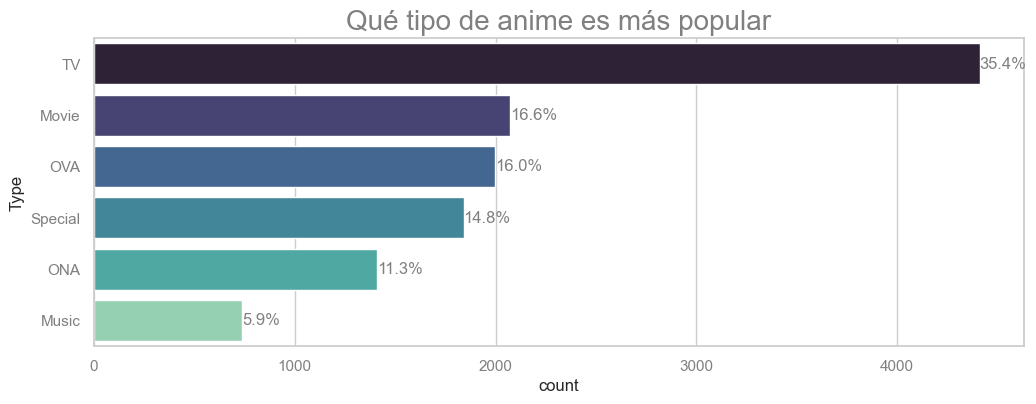

In [85]:
tipo= anime_copia["Type"]

plt.figure(figsize=(12,4))
sns.countplot(y=tipo, order=tipo.value_counts().index, palette="mako", hue= tipo)
plt.title("Qué tipo de anime es más popular", color="Grey",fontsize=20)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

total_animes= len(tipo)
for i, value in enumerate(tipo.value_counts().values):
    porcentaje=(value / total_animes) * 100
    plt.text(value+0.1, i, f"{porcentaje:.1f}%", ha="left", va="center", color="grey")

plt.show()

     Los tipos de animes mas comunes con diferencia son las series. 

##### Que series de anime son mas populares

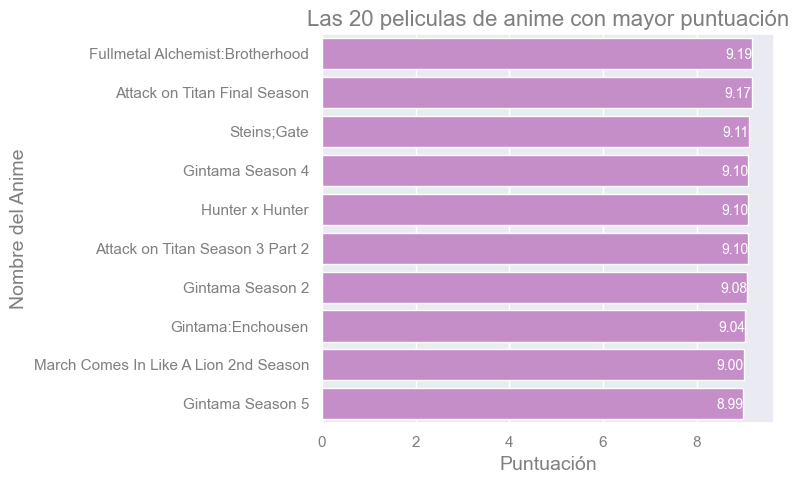

In [120]:
anime_tv= anime_copia[anime_copia["Type"]=="TV"]
anime_tv= anime_tv.sort_values(by="Score", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax=sns.barplot(x="Score", y="English name", data=anime_tv, color= "#CE84D2")
plt.title("Las 20 peliculas de anime con mayor puntuación", color="Grey", fontsize=16)
plt.xlabel("Puntuación", color="Grey", fontsize=14)
plt.ylabel("Nombre del Anime", color="Grey", fontsize=14)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

for index, value in enumerate(anime_tv["Score"]):
    ax.text(value, index, f"{value:.2f}",ha="right", va="center_baseline", color="white", fontsize=10)
    
plt.tight_layout()
plt.show()

##### Que peliculas de anime son mas populares

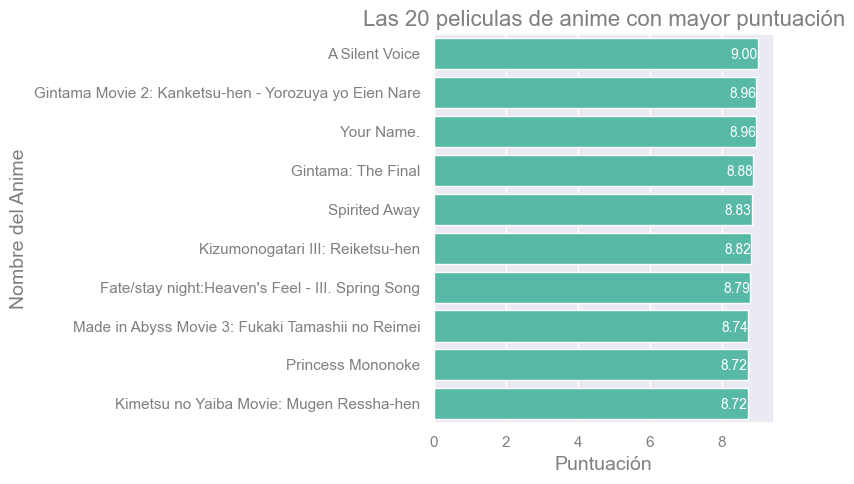

In [101]:
anime_mov= anime_copia[anime_copia["Type"]=="Movie"]
anime_mov= anime_mov.sort_values(by="Score", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax=sns.barplot(x="Score", y="English name", data=anime_mov, color= "#48C9B0")
plt.title("Las 20 peliculas de anime con mayor puntuación", color="Grey", fontsize=16)
plt.xlabel("Puntuación", color="Grey", fontsize=14)
plt.ylabel("Nombre del Anime", color="Grey", fontsize=14)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

for index, value in enumerate(anime_mov["Score"]):
    ax.text(value, index, f"{value:.2f}", ha="right", va="center_baseline", color="white", fontsize=10)
    
plt.tight_layout()
plt.show()

##### Correlacion para ver si existe relacion entre la puntiacion media y la popularidad: (hipotesis 1)

In [90]:
anime_copia.columns

Index(['Name', 'Score', 'Genres', 'English name', 'Month Aired',
       'Duracion_min', 'Type', 'Episodes', 'Premiered', 'Studios', 'Source',
       'Rating', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

In [91]:
#RELACION ENTRE LA PUNTUACION MEDIA Y LA POPULARIDAD
correlacion= anime_copia["Completed"].corr(anime_copia["Score"])
correlacion

0.3717736812964454

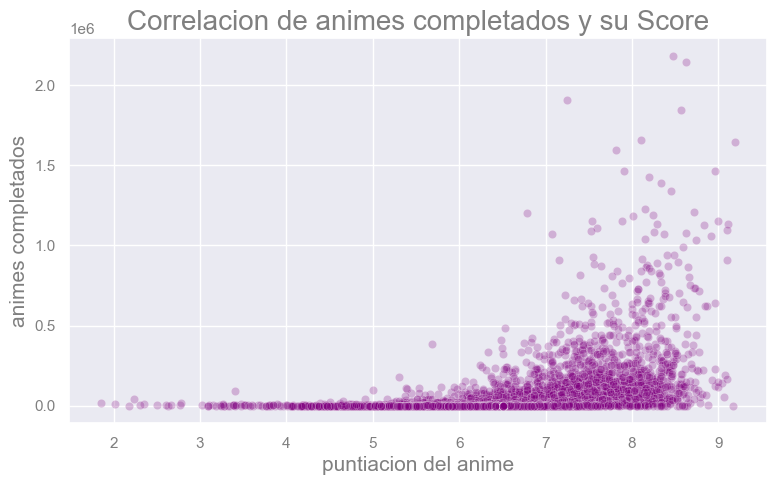

In [92]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="Score", y="Completed", data=anime_copia, alpha=0.25, color= "purple")
plt.title("Correlacion de animes completados y su Score", color= "Grey", fontsize= 20)
plt.xlabel("puntiacion del anime",color= "Grey", fontsize=15)
plt.ylabel("animes completados", color= "Grey",fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

    Correlacion positiva moderada. Influye de manera positiva, esto quiere decir que si puntuacion de animes aumenta la cantidad de animes que las personas completan.

##### HIPOTESIS 3.Diferencia en la puntuación media entre animes de diferentes fuentes (manga, novela, original)

In [95]:
anime_copia.columns

Index(['Name', 'Score', 'Genres', 'English name', 'Month Aired',
       'Duracion_min', 'Type', 'Episodes', 'Premiered', 'Studios', 'Source',
       'Rating', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

In [96]:
#VER LA PUNTUACION MEDIA ENTRE ANIMES DE DIFERENTES SOURCES
fuentes= anime_copia[anime_copia["Source"] !="Unknown"]
estadisticas= fuentes.groupby("Source")["Score"].describe()#GRAFICO QUE MUESTRE LA PUNTUACION MEDIA 

#ANOVA

estadisticas

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
4-koma manga,272.0,6.730000,0.694936,5.07,6.2800,6.650,7.2600,8.33
Book,86.0,6.586512,0.564671,5.21,6.2875,6.510,6.9350,8.12
Card game,64.0,6.380469,0.559128,5.09,6.0275,6.510,6.6825,7.67
Digital manga,10.0,5.708000,1.055997,4.72,4.7850,5.235,6.7275,7.12
Game,791.0,6.420746,0.695612,1.85,6.0700,6.510,6.8550,8.44
Light novel,695.0,7.071784,0.694942,4.01,6.6350,7.110,7.5050,8.93
Manga,3335.0,6.940456,0.787900,2.18,6.5000,6.950,7.4800,9.19
Music,211.0,5.912275,0.810262,4.36,5.2800,5.700,6.5100,8.34
Novel,448.0,6.828080,0.790347,3.15,6.3800,6.710,7.3700,9.07


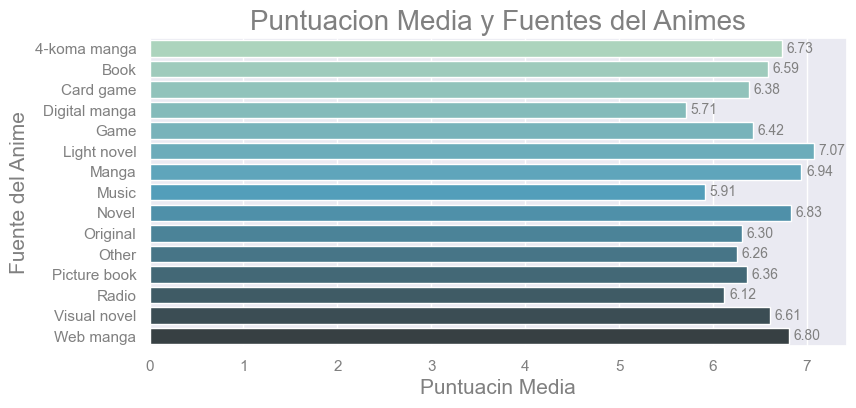

In [97]:
#GRAFICO DE BARRAS PARA VISUALIZAR LA PUNTUACION MEDIA. INTENTE CON UN BOXPLOT PERO SALIA FATAL
plt.figure(figsize=(9,4))
sns.set_style("darkgrid")
ax=sns.barplot(x=estadisticas["mean"].values, y=estadisticas.index, hue=estadisticas.index, palette="GnBu_d", dodge=False)

plt.title("Puntuacion Media y Fuentes del Animes", color="Grey", fontsize=20)
plt.xlabel("Puntuacin Media", color="Grey", fontsize=15)
plt.ylabel("Fuente del Anime", color="Grey", fontsize=15)
plt.xticks(rotation=0)
ax.tick_params(axis="x", colors="grey")
ax.tick_params(axis="y",colors="grey")

#PONERLE LA PUNTUACION MEDIA AL FINAL DE LA FILA
for i, v in enumerate(estadisticas["mean"].values):
    ax.text(v+0.05, i, f"{v:.2f}", ha="left", va="center", fontsize=10, color="grey")

plt.show()

     La fuente light novel tiene la puntuacion media mas alta. por lo tanto los animes basados e novelas ligeras suelen tener mejor puntuacion. la fuente manga digical tiene la puntuacion media mas baja.

     La novela ligera y el manga tienen las puntuaciones medias mas altas. asi que los animes basados en esos tienden a ser mejore recibidos


##### HIPOTESIS 2.Las puntuaciones se puede ver afectada por la duracion del anime

<Axes: title={'center': 'Score'}, xlabel='Type'>

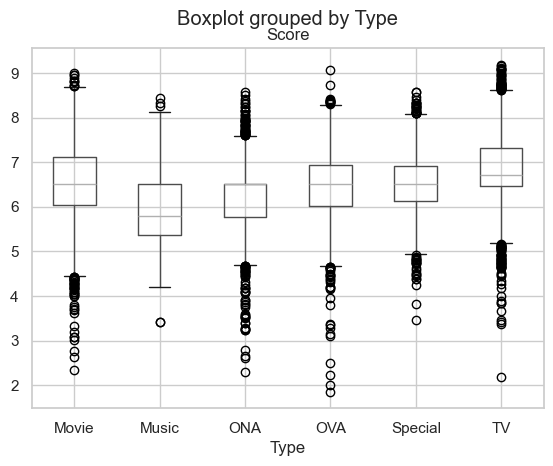

In [196]:
anime_copia.boxplot(column=("Score"),by="Type")

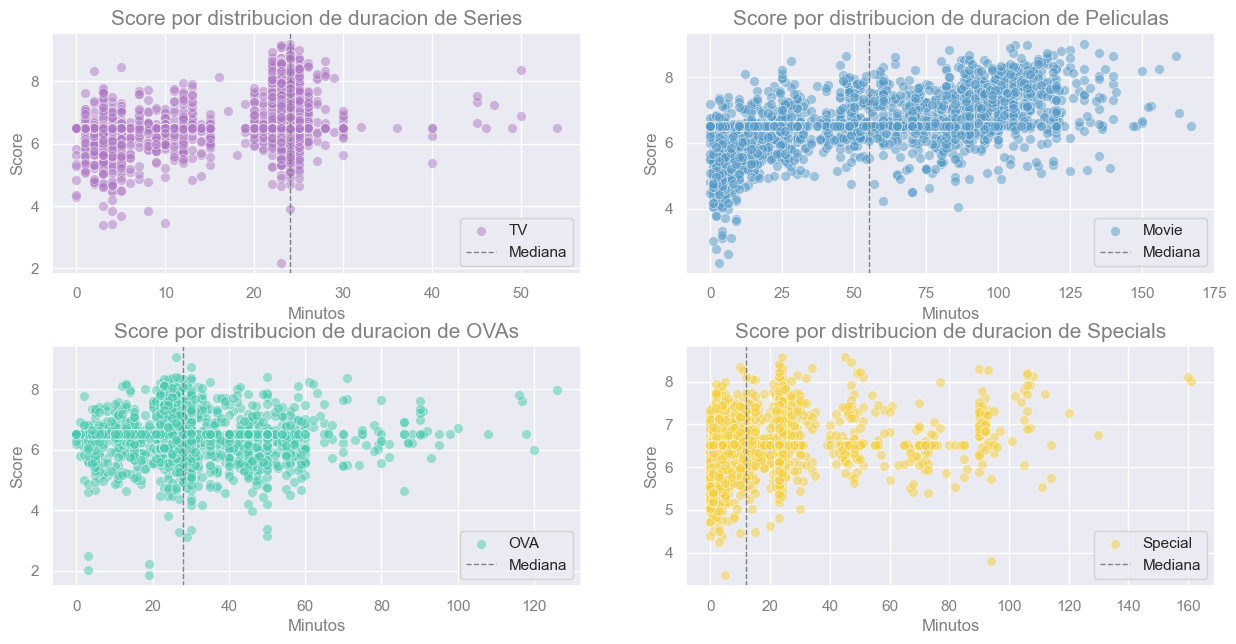

In [99]:
#DISTRIBUCION DE DURACION DE ANIMES
plt.figure(figsize=(15, 7))
plt.subplot(2,2,1)
tv= sns.scatterplot(x="Duracion_min", y="Score", data=anime_copia[anime_copia["Type"]== "TV"], label="TV",s=50, color="#AF7AC5",alpha=0.5)
tv.axvline(anime_copia[anime_copia["Type"]=="TV"]["Duracion_min"].median(),color="grey",linestyle="dashed", linewidth=1, label="Mediana")
tv.set_title("Score por distribucion de duracion de Series", color="grey",fontsize= 15)
tv.set_xlabel("Minutos", color="grey",fontsize=12)
tv.set_ylabel("Score", color="grey",fontsize=12)
tv.tick_params(axis="x",colors="grey")
tv.tick_params(axis="y", colors="grey")
plt.legend()

plt.subplot(2,2,2)
mov= sns.scatterplot(x="Duracion_min", y="Score", data=anime_copia[anime_copia["Type"]== "Movie"], label="Movie",s=50, color="#5499C7",alpha=0.5)
mov.axvline(anime_copia[anime_copia["Type"]=="Movie"]["Duracion_min"].median(),color="grey",linestyle="dashed", linewidth=1,label="Mediana")
mov.set_title("Score por distribucion de duracion de Peliculas", color="grey",fontsize= 15)
mov.set_xlabel("Minutos", color="grey", fontsize=12)
mov.set_ylabel("Score", color="grey", fontsize=12)
mov.tick_params(axis="x",colors="grey")
mov.tick_params(axis="y", colors="grey")
plt.legend()


plt.subplot(2,2,3)
ova= sns.scatterplot(x="Duracion_min", y="Score", data=anime_copia[anime_copia["Type"]== "OVA"], label="OVA",s=50, color="#48C9B0",alpha=0.5)
ova.axvline(anime_copia[anime_copia["Type"]=="OVA"]["Duracion_min"].median(),color="grey",linestyle="dashed", linewidth=1,label="Mediana")
ova.set_title("Score por distribucion de duracion de OVAs", color="grey",fontsize= 15)
ova.set_xlabel("Minutos", color="grey",fontsize=12)
ova.set_ylabel("Score", color="grey",fontsize=12)
ova.tick_params(axis="x",colors="grey")
ova.tick_params(axis="y", colors="grey")
plt.legend()


plt.subplot(2,2,4)
sp= sns.scatterplot(x="Duracion_min", y="Score", data=anime_copia[anime_copia["Type"]== "Special" ], label="Special",s=50, color="#F4D03F",alpha=0.5)
sp.axvline(anime_copia[anime_copia["Type"]=="Special"]["Duracion_min"].median(),color="grey",linestyle="dashed", linewidth=1,label="Mediana")
sp.set_title("Score por distribucion de duracion de Specials", color="grey",fontsize= 15)
sp.set_xlabel("Minutos", color="grey",fontsize=12)
sp.set_ylabel("Score", color="grey",fontsize=12)
sp.tick_params(axis="x",colors="grey")
sp.tick_params(axis="y", colors="grey")
plt.legend()

plt.subplots_adjust(wspace=0.2, hspace=0.3,top=0.9)
plt.show()

     Los animes mas largos tienden a tener puntuaciones mas altas.

     TV: las puntuaciones de las series de anime varian pero la duracion tiende a ser similar. parece ser que tiene una duracion promedio
     MOVIES: Las puntuaciones de las peliculas varian menos y una duracion esta en una diracion mas especifica

     Creo que la puntuacion de un anime si se puede ver afectada por su duracion

#### <span style="color:#3498DB  "> Analisis multivariante: </span> 

##### La relacion entre favoritos, popularidad, animes completados

In [100]:
users= anime_copia.sort_values(by="Popularity",ascending=False).head(20)

columnas= ["Popularity","Favorites","Completed"]

users.groupby("Type").agg({"Favorites":"mean","Completed":"mean"})


,Favorites,Completed
Type,,
Movie,0.000000,71.200000
Music,4.000000,348.000000
ONA,0.000000,69.666667
OVA,0.333333,49.666667
Special,0.500000,137.000000
TV,0.400000,51.600000


In [101]:
c= users[["Popularity","Favorites","Completed"]].corr()
c

,Popularity,Favorites,Completed
Popularity,1.000000,0.958555,0.938618
Favorites,0.958555,1.000000,0.927925
Completed,0.938618,0.927925,1.000000


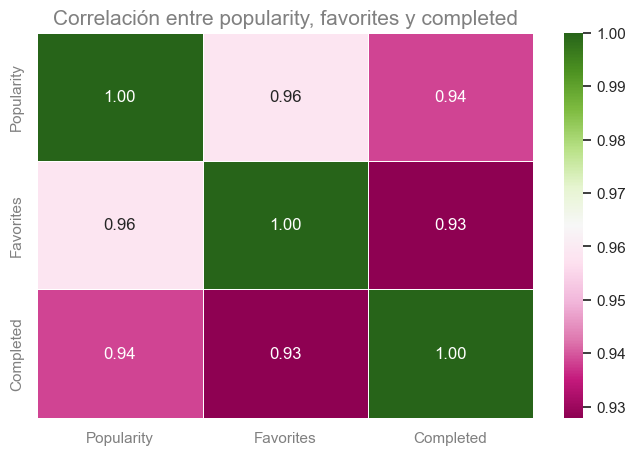

In [102]:
plt.figure(figsize=(8,5))
sns.heatmap(c, annot=True, cmap="PiYG", fmt=".2f", linewidths=.5)
plt.title("Correlación entre popularity, favorites y completed",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()



-Hay una correlacion positiva y fuerte entre popularidad y favoritos. cuando la popularidad de un anime aumenta aumenta la cantidad de favoritos. 

-Entre popularidad y completados tambien indica que los animes tenden a tener un mayor numero de usuarios que lo completan

-Entre favoritos y completados hay una correlacion positiva e indica que los animes que son favoritos tienden a ser completados

##### Relacion entre popularidad, miembros, abandonados y pausados

In [103]:
users= anime_copia.sort_values(by="Popularity",ascending=False).head(20)
columnas= ["Popularity","Members", "Dropped","On-Hold"]

users.groupby("Type").agg({"On-Hold":"mean","Dropped":"mean", "Members":"mean"})

,On-Hold,Dropped,Members
Type,,,
Movie,4.400000,44.200000,201.000000
Music,13.000000,19.000000,672.000000
ONA,3.666667,31.666667,200.666667
OVA,5.000000,39.333333,200.333333
Special,1.000000,11.500000,201.000000
TV,5.000000,43.800000,201.000000


In [104]:
cor= users[["Popularity","On-Hold","Members","Dropped"]].corr()
cor

,Popularity,On-Hold,Members,Dropped
Popularity,1.000000,0.875171,0.999841,-0.397935
On-Hold,0.875171,1.000000,0.879599,-0.172789
Members,0.999841,0.879599,1.000000,-0.398890
Dropped,-0.397935,-0.172789,-0.398890,1.000000


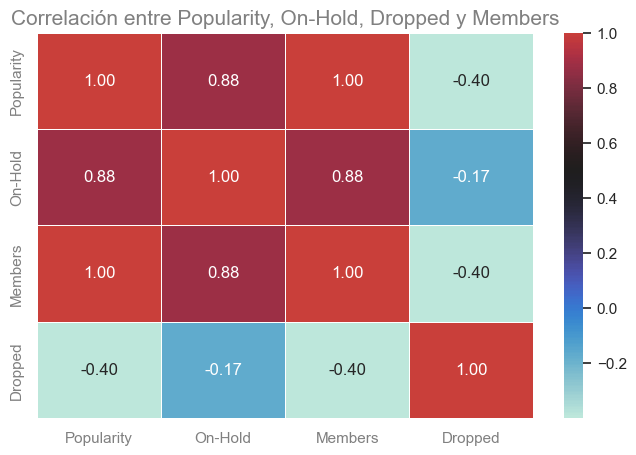

In [105]:
plt.figure(figsize=(8,5))
sns.heatmap(cor, annot=True, center = 0.5, fmt=".2f", linewidths=.5)
plt.title("Correlación entre Popularity, On-Hold, Dropped y Members",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

##### La relacion de la Popularity y Score entre animes de tipo tv y animes de tipo pelicula

In [740]:
# SERIES DE ANIME: CORRELACION DE LA POPULARIDAD Y SCORE
tv_anime= anime_copia[anime_copia["Type"] =="TV"]
movie_anime= anime_copia[anime_copia["Type"]== "Movie"]

In [741]:
tv_anime["Score"].corr(tv_anime["Popularity"])

#PELICULAS DE ANIME:CORRELACION DE LA POPULARIDAD Y SCORE
movie_anime["Score"].corr(movie_anime["Popularity"])


-0.6418564158189884

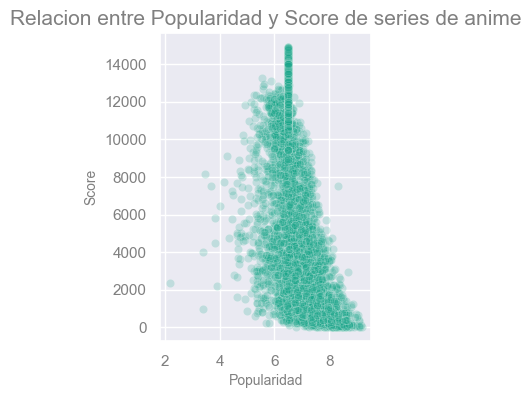

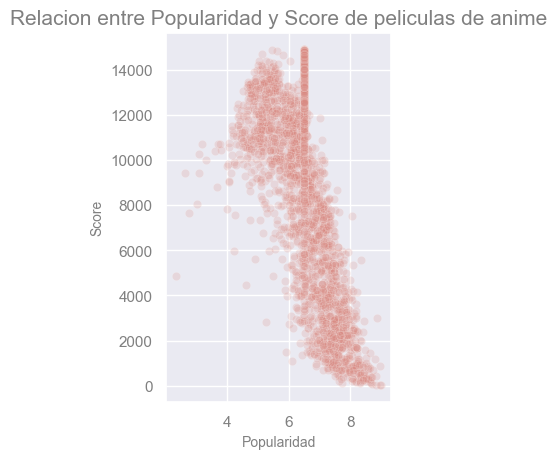

In [742]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=tv_anime, x= "Score", y="Popularity", color="#17A589", alpha= 0.2)

plt.xlabel("Popularidad",color= "Grey", fontsize= 10)
plt.ylabel("Score",color= "Grey", fontsize= 10)
plt.title("Relacion entre Popularidad y Score de series de anime",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show() 

plt.subplot(1, 2, 2)
sns.scatterplot(data=movie_anime, x= "Score", y="Popularity", color="#D98880", alpha= 0.2)

plt.xlabel("Popularidad",color= "Grey", fontsize= 10)
plt.ylabel("Score", color= "Grey", fontsize= 10)
plt.title("Relacion entre Popularidad y Score de peliculas de anime",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()


In [111]:
#PELICULAS DE ANIME:CORRELACION DE LA POPULARIDAD Y SCORE
movie_anime["Score"].corr(movie_anime["Popularity"])

-0.6418564158189884

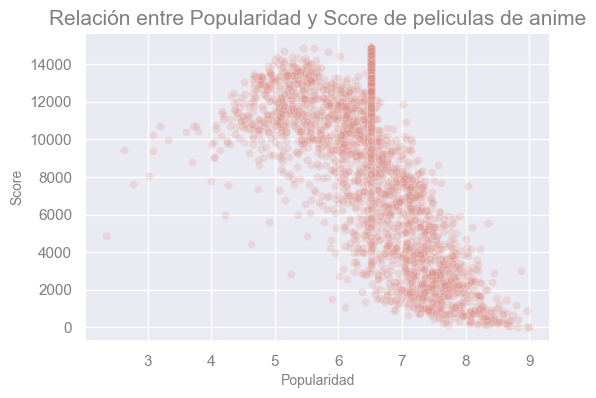

In [112]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=movie_anime, x= "Score", y="Popularity", color="#D98880", alpha= 0.2)

plt.xlabel("Popularidad",color= "Grey", fontsize= 10)
plt.ylabel("Score", color= "Grey", fontsize= 10)
plt.title("Relacion entre Popularidad y Score de peliculas de anime",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()



In [2696]:
es=anime_copia.groupby("Type").agg({"Popularity": ["mean","median"]})

Popularity         
                 mean   median
Type                          
Movie     8569.419279   9464.5
Music    11320.620968  11999.0
ONA       9591.083504  10286.0
OVA       7550.062992   7482.0
Special   7486.345371   7005.0
TV        5450.220063   3985.5

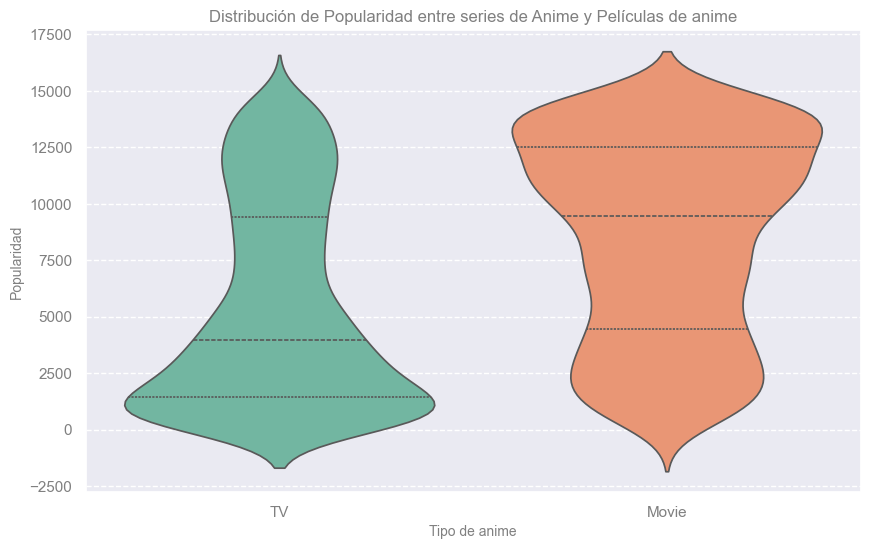

In [2706]:
tv_movie = anime_copia[anime_copia["Type"].isin(["TV", "Movie"])]

figure, axes = plt.subplots(figsize=(10, 6))
sns.violinplot(x="Type", y="Popularity", hue="Type", data=tv_movie, palette="Set2", inner="quartile", ax=axes, legend=False)
axes.set_xlabel("Tipo de anime", color="Grey", fontsize=10)
axes.set_ylabel("Popularidad", color="Grey", fontsize=10)
axes.set_title("Distribución de Popularidad entre series de Anime y Películas de anime", color="Grey", fontsize=12)
axes.tick_params(axis="x", colors="grey")
axes.tick_params(axis="y", colors="grey")

plt.show()

      Las peliculas de anime tienden a ser mas populares que las series de anime.

      las peliculas tienen una popularidad de 8569 y las series de 5450.22

      Mi conclusion es que las peliculas atraen mas a los usuarios y les genera mas interes.

## <span style="color:#85929E"> CONCLUSIONES Y REFLEXIONES </span> 

In [2027]:
anime_copia.head(1)

,Name,Score,Genres,English name,Month Aired,Duracion_min,Type,Episodes,Premiered,Studios,Source,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,Apr,24,TV,26,Spring,Sunrise,Original,R,39,1251960,61971,105808,718161,71513,26678
